## Data Set Information:
This data record historical data of credit card customers as well as the label  if they were default or not. Each customers have several information attributes related to their credit card usage spanning 6 months back before default as well as the payments data.

## Objective Information:
1. Create the predictive Model to predict probability of default on  credit card customers




## Another note
The analysis was made as part of final assessment at DibimbingID Data Science Course

In [1]:
#import important libary
import pandas as pd
import numpy as np
import matplotlib as plt
import re

In [2]:
#import dataset
data = pd.read_csv('creditscoring_finalproject.csv')

In [3]:
# set unlimited column display - personal preference
pd.set_option('display.max_columns', None)

In [4]:
#inspect data set
data.head(10)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,"7,00E+06",23437,0,94,26323,I,"102,19",0,"74,78",100,0,0,"1,541,666,667",94,"13161,5","3,760,429","1,34E-05","1,171,875","17,809,524","13,228,036","21,949,333"
1,2,2,268691,"1,00E+07",254564,0,1012,0,A,0,0,0,0,0,0,"0,75",1012,0,0,"1,012",0,0,"4,231,625","3,00E-04"
2,3,3,6769149,"2,80E+07",4159779,0,0,0,A,100,0,100,"100,91",0,0,"10,75",0,0,0,0,"40,517,857","47,703,226","249,389,277","267,852,798"
3,4,4,3496732,"2,10E+07",111231,0,2536660,581334,G,100,0,"25,01","22,64",0,0,"19,75",2536660,"145333,5","27,682,571","120,793,333","55,970,595","16,850,794","101,912,107","346,634,603"
4,5,2,9402085,"1,00E+07",6099283,0,2666558,5951865,A,"95,99",0,"97,49","99,84",0,0,"1,666,666,667",2666558,"2975932,5","5,951,865","2,666,558","323,027","131,162,467","707,865,025","336,571,367"
5,6,2,6227439,"8,00E+07",2081248,0,3690250,4613435,A,0,0,"28,46","42,03",0,0,"10,25",3690250,"2306717,5","57,667,938","46,128,125","17,184,375","117,513,096","38,963,606","181,863,421"
6,7,2,3906290,"4,00E+06",2043682,0,230400,3314046,A,"18,47",0,"24,95","17,89",0,0,"4,666,666,667",230400,1657023,"8,285,115",576,"1,875","166,666,668","1,014,775,813","977,230,833"
7,8,4,9534837,"2,00E+07",3692028,0,9327612,7881069,A,"58,55",0,"105,24","166,67",0,0,"0,75",9327612,"1970267,25","39,405,345","4,663,806","2,392,893","241,598,694","261,753,338","22,402,625"
8,9,2,4145065,"5,00E+06",4021399,0,335680,4122425,B,"15,24",0,0,"33,33",0,0,"5,666,666,667",335680,"2061212,5","824,485","67,136","19,604,205",0,"47,002,435",0
9,10,4,1818606,"7,00E+06",1765911,0,0,1627786,A,100,0,"58,4","62,68",0,0,"8,5",0,"406946,5","232,540,857",0,75,"94,800,619","315,145,179","626,447,904"


Colums that are considered as irrelevant are :
    
    1. 'X' : Same with Index
    
    2. 'kode_cabang' : are not transaction / usage related data
    
    

In [5]:
#inspect dataset columns type and row count
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   X                                    15493 non-null  int64 
 1   jumlah_kartu                         15493 non-null  int64 
 2   outstanding                          15493 non-null  int64 
 3   limit_kredit                         15493 non-null  object
 4   tagihan                              15493 non-null  object
 5   total_pemakaian_tunai                15493 non-null  object
 6   total_pemakaian_retail               15493 non-null  object
 7   sisa_tagihan_tidak_terbayar          15493 non-null  object
 8   kode_cabang                          15393 non-null  object
 9   rasio_pembayaran                     15493 non-null  object
 10  persentasi_overlimit                 15493 non-null  object
 11  rasio_pembayaran_3bulan              1549

In [6]:
#Identify target variable
data['flag_kredit_macet'].unique()

array([0, 1])

flag_kredit_macet is assumed to be target variable as it contains two unique values ( 0 or 1). Based on

domain knowledge, '1' is considered default flag

In [7]:
#check if there any missing values
data.isnull().sum()

X                                        0
jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6

There are 100 missing values of Kode Cabang column. But as mention before, it will not be used then no treatment

In [8]:
#inspect and convert limit_kredit into float
print(data.limit_kredit.unique())
data['limit_kredit'] = data['limit_kredit'].str.replace(',','.')
data['limit_kredit'] = data['limit_kredit'].astype('float')


['7,00E+06' '1,00E+07' '2,80E+07' '2,10E+07' '8,00E+07' '4,00E+06'
 '2,00E+07' '5,00E+06' '8,40E+07' '2,30E+07' '9,00E+06' '3,00E+06'
 '1,00E+08' '1,30E+07' '1,80E+07' '7,50E+07' '8,00E+06' '1,20E+07'
 '6,00E+06' '5,00E+07' '8,90E+07' '5,90E+07' '3,00E+07' '4,00E+07'
 '1,50E+07' '2,50E+07' '6,60E+07' '6,20E+07' '3,90E+07' '5,20E+07'
 '4,10E+07' '2,70E+07' '5,60E+07' '6,80E+07' '4,80E+07' '5,70E+07'
 '5,80E+07' '3,60E+07' '5,10E+07' '7,80E+07' '1,60E+07' '7,10E+07'
 '8,70E+07' '9,70E+07' '2,20E+07' '4,30E+07' '4,50E+07' '3,80E+07'
 '3,50E+07' '4,60E+07' '9,10E+07' '2,40E+07' '4,90E+07' '1,90E+07'
 '1,40E+07' '7,00E+07' '2,90E+07' '6,30E+07' '1,70E+07' '1,11E+08'
 '6,50E+07' '7500000' '6,00E+07' '8,10E+07' '9,30E+07' '4,70E+07'
 '1,10E+07' '4,40E+07' '8,50E+07' '4,20E+07' '5,50E+07' '2,60E+07'
 '7,30E+07' '1,20E+08' '7,70E+07' '8,20E+07' '7,90E+07' '9,90E+07'
 '6,40E+07' '8,30E+07' '1,19E+08' '1,14E+08' '6,10E+07' '2,00E+08'
 '7,20E+07' '3,30E+07' '9,00E+07' '5,40E+07' '9,50E+07' '3,40E+

In [9]:
#inspect and convert tagihan column into float
print(data.tagihan.unique())
data['tagihan'] = data['tagihan'].str.replace(',','.')
data['tagihan'] = data['tagihan'].astype('float')

['23437' '254564' '4159779' ... '2869674' '20527879' '3939921']


In [10]:
#inspect and convert total_pemakaian_tunai into float
print(data['total_pemakaian_tunai'].unique())
data['total_pemakaian_tunai'] = data['total_pemakaian_tunai'].str.replace(',','.')
data['total_pemakaian_tunai'] = data['total_pemakaian_tunai'].astype('float')

['0' '1300000' '9,00E+05' '1250000' '7,00E+05' '5,00E+05' '8,00E+05'
 '1,00E+05' '95000' '1700000' '3,00E+05' '2,00E+06' '6,00E+05' '1194665'
 '3601072' '50000' '2800000' '4,00E+05' '8,00E+06' '3,00E+06' '2900000'
 '1,00E+06' '2500000' '4350000' '4,00E+06' '1648194' '290000' '5053700'
 '1500000' '606120' '1200000' '2,00E+05' '2050000' '3500000' '1050000'
 '1,50E+07' '2600000' '5050000' '3300000' '150000' '4250000' '3100000'
 '2080000' '3800000' '2100000' '2200000' '350000' '880000' '3600000'
 '1100000' '2400000' '5,00E+06' '3900000' '1600000' '2300000' '4500000'
 '4900000' '3380000' '7500000' '1400000' '250000' '8500000' '550000'
 '450000' '1800000' '4200000' '590000' '7,00E+06' '5700000' '3250000'
 '6,00E+06' '140817' '1750000' '240000' '1550000' '750000' '1150000'
 '28840572' '2650000' '1579000' '1850000' '1900000' '1,00E+07' '13200000'
 '12500000' '3400000' '2396440' '28733412' '650000' '2250000' '5800000'
 '1450000' '490000' '175000']


In [11]:
#inspect and convert total_pemakaian_retail into float
print(data.total_pemakaian_retail.unique())
data['total_pemakaian_retail'] = data['total_pemakaian_retail'].str.replace(',','.')
data['total_pemakaian_retail'] = data['total_pemakaian_retail'].astype('float')

['94' '1012' '0' ... '277' '238' '1018']


In [12]:
#inspect and convert sisa_tagihan_tidak_terbayar into float
print(data.sisa_tagihan_tidak_terbayar.unique())
data['sisa_tagihan_tidak_terbayar'] = data['sisa_tagihan_tidak_terbayar'].str.replace(',','.')
data['sisa_tagihan_tidak_terbayar'] = data['sisa_tagihan_tidak_terbayar'].astype('float')

['26323' '0' '581334' ... '1551674' '3191621' '246512']


In [13]:
#inspect and convert rasio_pembayaran into float
print(data.rasio_pembayaran.unique())
data['rasio_pembayaran'] = data['rasio_pembayaran'].str.replace(',','.')
data['rasio_pembayaran'] = data['rasio_pembayaran'].astype('float')

['102,19' '0' '100' ... '-18138' '75' '150']


In [14]:
#inspect and convert persentasi_overlimit into float
print(data.persentasi_overlimit.unique())
data['persentasi_overlimit'] = data['persentasi_overlimit'].str.replace(',','.')
data['persentasi_overlimit'] = data['persentasi_overlimit'].astype('float')


['0' '10,02' '23,26' ... '56' '99' '0,97']


In [15]:
#inspect and convert rasio_pembayaran_3bulan into float
print(data.rasio_pembayaran_3bulan.unique())
data['rasio_pembayaran_3bulan'] = data['rasio_pembayaran_3bulan'].str.replace(',','.')
data['rasio_pembayaran_3bulan'] = data['rasio_pembayaran_3bulan'].astype('float')

['74,78' '0' '100' ... '937' '6,9' '-14']


In [16]:
#inspect and convert rasio_pembayaran_6bulan into float
print(data.rasio_pembayaran_6bulan.unique())
data['rasio_pembayaran_6bulan'] = data['rasio_pembayaran_6bulan'].str.replace(',','.')
data['rasio_pembayaran_6bulan'] = data['rasio_pembayaran_6bulan'].astype('float')

['100' '0' '100,91' ... '61,8' '-1116' '7,07']


The numeric range in 'jumlah_tahun_sejak_pembukaan_kredit' is illogical since half of them are in million years, would be dropped from model

In [17]:
#inspect and convert total_pemakaian into float
print(data['total_pemakaian'].unique())
data['total_pemakaian'] = data['total_pemakaian'].str.replace(',','.')
data['total_pemakaian'] = data['total_pemakaian'].astype('float')

['94' '1012' '0' ... '1400277' '238' '1018']


In [18]:
#Do the same way of cleansing to other columns 
formating_columns = ['sisa_tagihan_per_jumlah_kartu','sisa_tagihan_per_limit','total_pemakaian_per_limit','pemakaian_3bln_per_limit',
                     'pemakaian_6bln_per_limit','utilisasi_3bulan','utilisasi_6bulan','jumlah_tahun_sejak_pembukaan_kredit']
for i in formating_columns:
    kondisi1 = data[i].str.contains(r'.*\,.{3}$')
    kondisi2 = data[i].str.contains(r'.*\,.{1,2}')
    kondisi3 = data[i].str.contains('E')
    data_kondisi1 = data[kondisi1][i].unique()
    data_kondisi2 = data[kondisi2][i].unique()
    data_kondisi3 = data[kondisi3][i].unique()
    data[i] = data[i].map(lambda x: x.replace(',',''))
    data[i] = data[i].astype('float')

In [19]:
#Check cleansing result
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

## EDA

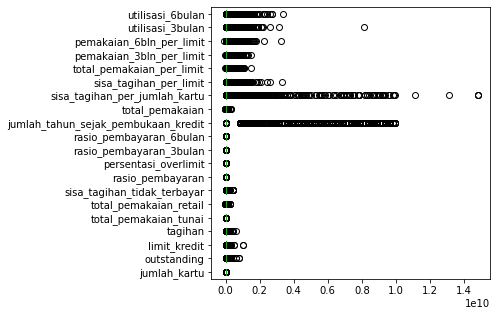

In [20]:
#Visualize outlier on the numeric variables
numerics = ['int64','float64']
boxplot_data = data.select_dtypes(include=numerics).copy()
to_drop_boxplot = ['skor_delikuensi','X','flag_kredit_macet']
boxplot_data = boxplot_data.drop(to_drop_boxplot,axis = 1)

boxplot_data.boxplot(
    column=list(boxplot_data.columns),
    fontsize=10,
    rot=0,
    grid=False,
    figsize=(5,5),
    vert=False
    )
plt.pyplot.savefig('boxplot.png')

In [21]:
# get IQR for each final numeric column
numerics = ['int64','float64']
iqr_data= data.select_dtypes(include=numerics).copy()
to_drop_iqr = ['skor_delikuensi','X','flag_kredit_macet']
iqr_data = iqr_data.drop(to_drop_boxplot,axis = 1)

Q1 = iqr_data.quantile(0.25)
Q3 = iqr_data.quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 jumlah_kartu                                 2.0
outstanding                            2000551.0
limit_kredit                           5000000.0
tagihan                                 818250.0
total_pemakaian_tunai                        0.0
total_pemakaian_retail                       0.0
sisa_tagihan_tidak_terbayar                  0.0
rasio_pembayaran                             0.0
persentasi_overlimit                         0.0
rasio_pembayaran_3bulan                     20.2
rasio_pembayaran_6bulan                     21.6
jumlah_tahun_sejak_pembukaan_kredit        121.0
total_pemakaian                              0.0
sisa_tagihan_per_jumlah_kartu                0.0
sisa_tagihan_per_limit                       0.0
total_pemakaian_per_limit                    0.0
pemakaian_3bln_per_limit                   128.0
pemakaian_6bln_per_limit                   122.0
utilisasi_3bulan                           136.0
utilisasi_6bulan                           144.0
Name: 0.25, dty

In [22]:
boxplot_min['jumlah_kartu']

0.5

In [23]:
# remove outlier for visually extreme columns
extreme_columns = ['sisa_tagihan_per_jumlah_kartu','jumlah_tahun_sejak_pembukaan_kredit']
data_model = data.copy()
for i in iqr_data.columns:
  data_model[i] = data_model[i].map(lambda x: boxplot_min[i] if x<boxplot_min[i] else boxplot_max[i] if x >boxplot_max[i] else x)
 

<AxesSubplot:>

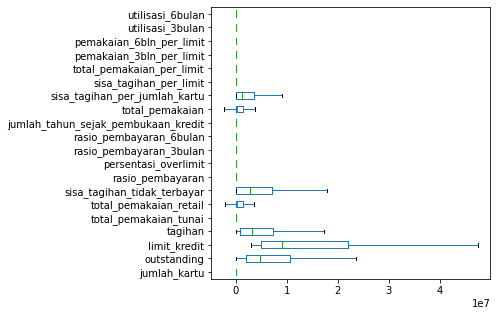

In [24]:
#Visualize outlier again
numerics = ['int64','float64']
boxplot_model = data_model.select_dtypes(include=numerics).copy()
to_drop_boxplot_model = ['skor_delikuensi','X','flag_kredit_macet']
boxplot_model = boxplot_model.drop(to_drop_boxplot,axis = 1)

boxplot_model.boxplot(
    column=list(boxplot_data.columns),
    fontsize=10,
    rot=0,
    grid=False,
    figsize=(5,5),
    vert=False
    )

In [25]:
#check the result of removing outlier
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  float64
 2   outstanding                          15493 non-null  float64
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

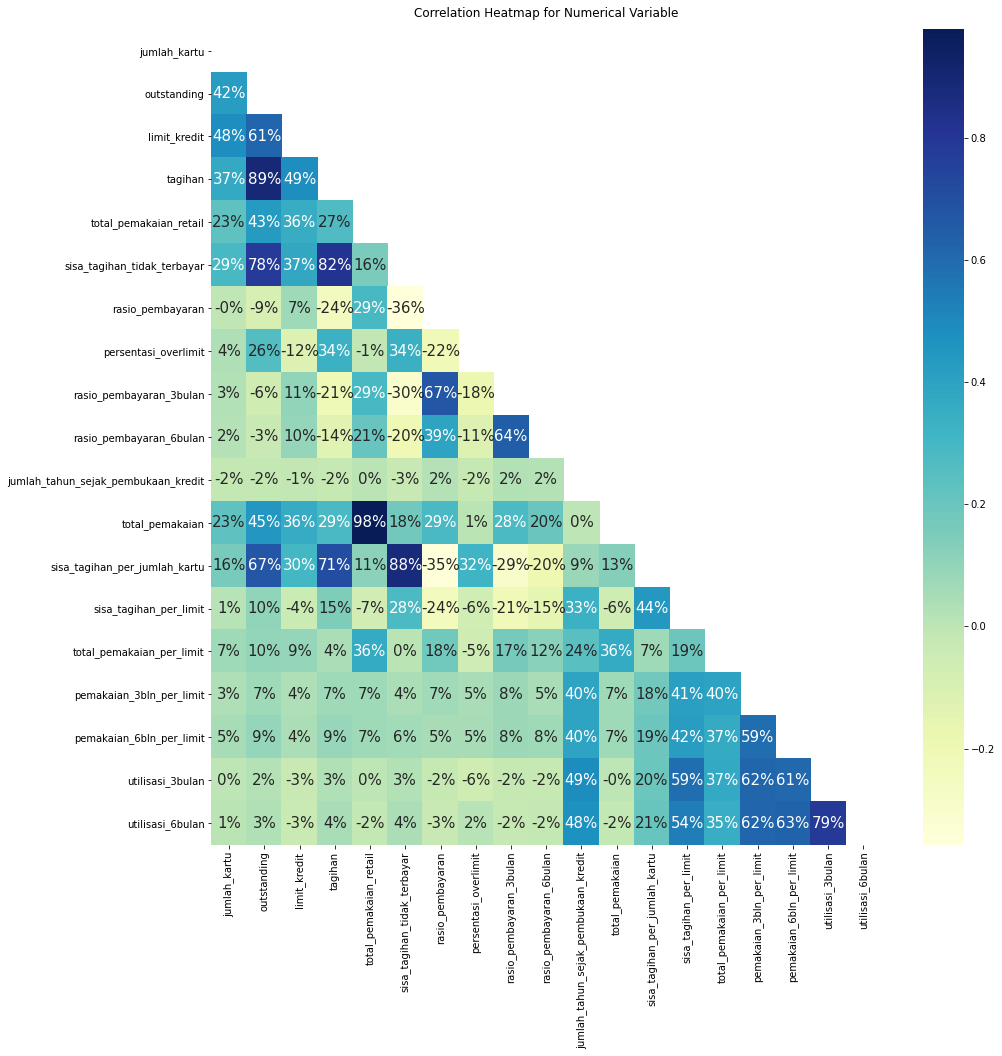

In [26]:
#check for multicollinearity for non categorical numeric columns
import seaborn as sns
numerics = ['int64','float64']
correlation = data_model.select_dtypes(include=numerics).copy()
to_drop = ['skor_delikuensi','X','flag_kredit_macet','total_pemakaian_tunai']
correlation =correlation.drop(to_drop, axis = 1)


correlation_between_column = correlation.corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.pyplot.subplots(figsize=(15,15))
heatmap_numerical = sns.heatmap(correlation_between_column,annot = True, cmap="YlGnBu",fmt = '.0%',ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)
heatmap_numerical.set_title('Correlation Heatmap for Numerical Variable', fontdict={'fontsize':12}, pad=12)
plt.pyplot.savefig('heatmap.png')

There are several variables that need to be dropped due to being highly correlated with other variables

Threshold : 0.7

1. total_pemakaian_retail = correlated with total pemakaian

2. sisa_tagihan_tidak_terbayar = correlated with sisa_tagihan_per_jumlah_kartu

3. outstanding = correlated with tagihan


In [27]:
#recreate heatmap to see the result
to_drop_korelasi  =['total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar','outstanding','total_pemakaian_tunai']

In [28]:
#Finding the tendency of numerical variables  for Default or non default customer
numerics = ['int64','float64']
summary_data = data_model.select_dtypes(include=numerics).copy()
to_drop = ['skor_delikuensi','X']
to_drop_2 = to_drop_korelasi
summary_data =summary_data.drop(to_drop, axis = 1)
summary_data =summary_data.drop(to_drop_2, axis = 1)


summary_data.groupby('flag_kredit_macet').mean()


,jumlah_kartu,limit_kredit,tagihan,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
flag_kredit_macet,,,,,,,,,,,,,,,,
0,2.438659,1.638552e+07,5.122565e+06,52.923662,0.598198,58.058452,64.512563,441.157174,1.031210e+06,2.392016e+06,391.199448,295.019573,431.923540,425.318886,627.492996,603.256483
1,2.493745,1.754231e+07,6.788009e+06,15.478565,1.204025,29.744720,44.178396,425.075791,3.187179e+05,3.562641e+06,449.264533,122.231976,369.979464,384.209014,605.766740,610.897829


Interpretation for numeric variables

Default customer have :
                1.  Higher credit Limit
                2.  Higher card bill
                3.  lower payment ratio
                4. higher overlimit
                5. shorter membership duration
                6. Higher usage

                 flag_kredit_macet
skor_delikuensi                   
0                         0.087438
1                         0.241379
2                         0.250000
3                         0.000000
4                         0.000000
5                         0.000000


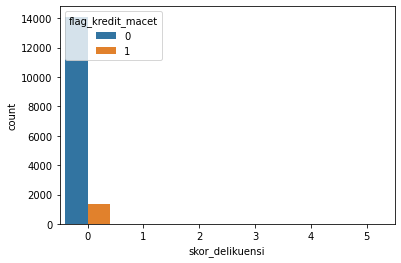

In [29]:
#Visualizing The distribution of  categorical variable - skor_delikuensi
sns.countplot(x = 'skor_delikuensi',hue = 'flag_kredit_macet', data = data_model)

print(data_model[['skor_delikuensi','flag_kredit_macet']].groupby('skor_delikuensi').mean())


It is seen that the distribution of skor_delikuensi is skewed towards the lower score

Visually, there is no clear trend of default status. Customers within skor_delikuensi '1','2',and '3' has significant defaults, while the rest are overwhelmingly non default

## Modelling

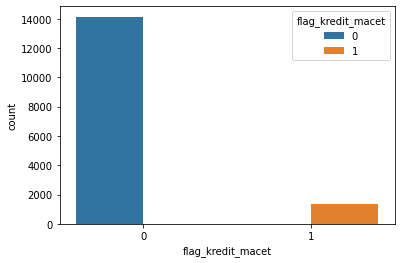

In [30]:
#Target Distribution
sns.countplot(x = 'flag_kredit_macet', hue ='flag_kredit_macet', data = data_model)
plt.pyplot.savefig('target_distribution.png')
    

Target distribution is very imbalance

In [31]:
#impot necessary package for modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [32]:
#Separate features and label
X = data_model.copy()
to_drop_on_model = ['X','total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar','outstanding','kode_cabang','flag_kredit_macet','total_pemakaian_tunai']
X = X.drop(to_drop_on_model, axis = 1)
Y = data_model['flag_kredit_macet'].copy()

In [33]:
X.columns

Index(['jumlah_kartu', 'limit_kredit', 'tagihan', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

In [34]:
#Install imblearn to handle imbalance data
!pip install imblearn


     |████████████████████████████████| 206 kB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 57.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 59.5 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.1 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


As mentioned befored that label data is skewed / imbalance,  Synthetic Minority Over-Sampling Technique(SMOTE) would be done to create balance

In [35]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20,stratify =Y , random_state=66)

In [36]:
#Handling imbalance data through SMOTE
from imblearn.over_sampling import SMOTE
X_balance_train,Y_balance_train = SMOTE().fit_resample(X_train,y_train)
X_balance_train = pd.DataFrame(X_balance_train, columns = X.columns)

In [37]:
#check the result of SMOTE
print(Y_balance_train.value_counts())

0    11307
1    11307
Name: flag_kredit_macet, dtype: int64


In [38]:
#Import several classifiers Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score

In [39]:
#Create dictionary for all classifier
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
}

In [40]:
#Build models using all classifier to compare
for key, classifier in classifiers.items():
    print('__________________________')
    print(key)
    steps = [('scaler', StandardScaler()),
        (key, classifier)]
    pipeline = Pipeline(steps)
    pipeline.fit(X_balance_train, Y_balance_train)
    train_score = pipeline.score(X_balance_train, Y_balance_train)
    print('train score: ', train_score)
    test_score = pipeline.score(X_test, y_test)
    print('test score: ', test_score)
    y_pred = pipeline.predict(X_test)
    print('precision_score: ',precision_score(y_test, y_pred))



__________________________
LogisticRegression
train score:  0.7485628371805076
test score:  0.680864795095192
precision_score:  0.1801962533452275
__________________________
KNeighbors
train score:  0.9093481913858672
test score:  0.749919328815747
precision_score:  0.19141104294478528
__________________________
SVC
train score:  0.8574776687008048
test score:  0.766053565666344
precision_score:  0.20998719590268886
__________________________
DecisionTree
train score:  1.0
test score:  0.8157470151661826
precision_score:  0.20743639921722112
__________________________
RandomForest
train score:  1.0
test score:  0.8877057115198451
precision_score:  0.35384615384615387


Random Forest Shows the highest performance on test score and precision score

In [41]:
#generate classification report
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
model.fit(X_balance_train,Y_balance_train)
prediction = model.predict(X_test)
score_cv = cross_val_score(model,X_balance_train,Y_balance_train,cv=3)
print(classification_report(y_test, prediction))
print("Cross Validation 3-Fold score result :")
print(score_cv)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2827
           1       0.35      0.34      0.34       272

    accuracy                           0.89      3099
   macro avg       0.64      0.64      0.64      3099
weighted avg       0.89      0.89      0.89      3099

Cross Validation 3-Fold score result :
[0.89692226 0.94547625 0.94215972]


Cross Validation score shows that Random forest model without tuning scored 93% in performance, by average

Hyperparameter tuning is done on random forest model to improve the performance

In [42]:
#Do parameter Tuning
from sklearn.model_selection import GridSearchCV

# Maximum number of levels in tree #
max_depth = [10, 50, 100,None]

# Minimum number of samples required to split a node #
min_samples_split = [1,2, 5, 10]
# Minimum number of samples required at each leaf node #
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree #
bootstrap = [True, False]

random_forest_model_tuning = RandomForestClassifier()
random_grid ={
                'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
model_tuned = GridSearchCV(random_forest_model_tuning, random_grid, cv = 3)
model_tuned.fit(X_balance_train,Y_balance_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 5, 10]})

In [43]:
#check the tuning result and print the best parameter
result_tuning = pd.DataFrame(model_tuned.cv_results_)
print("best parameter : ",model_tuned.best_params_)
print("____________________________________________________________________________")
result_tuning[['param_max_depth','param_min_samples_leaf',
               'param_min_samples_split','mean_test_score']].sort_values('mean_test_score',ascending = False).head(10)

best parameter :  {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}
____________________________________________________________________________


,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score
25,100,1,2,0.927744
13,50,1,2,0.927390
37,None,1,2,0.925489
14,50,1,5,0.923941
26,100,1,5,0.923410
38,None,1,5,0.923278
41,None,2,2,0.921243
29,100,2,2,0.920713
30,100,2,5,0.920138
17,50,2,2,0.919961


By doing hyperparameter tuning of 3 different parameters, the parameter combinations chosen would be changed into 100 for max_depth, 1 for min_sample_leaf, and 2 for min_sample_split

In [44]:
#generate classification report revision
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model2 = RandomForestClassifier(max_depth = 100, min_samples_leaf = 1, min_samples_split = 2)
model2.fit(X_balance_train,Y_balance_train)
prediction2 = model2.predict(X_test)
score_cv2 = cross_val_score(model2,X_balance_train,Y_balance_train,cv=3)
print(classification_report(y_test, prediction2))
print("Cross Validation 3-Fold score result :")
print(score_cv2)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2827
           1       0.35      0.34      0.34       272

    accuracy                           0.89      3099
   macro avg       0.64      0.64      0.64      3099
weighted avg       0.88      0.89      0.89      3099

Cross Validation 3-Fold score result :
[0.89864686 0.94388432 0.94149642]


Precision still very low,scaling in pipeline is needed

In [45]:
#Create scaling  & machine learning pipeline using default parameter
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())]
pipeline = Pipeline(steps)
pipeline.fit(X_balance_train,Y_balance_train)
prediction3 = pipeline.predict(X_test)
score_cv3 = cross_val_score(pipeline,X_balance_train,Y_balance_train,cv=3)
print(classification_report(y_test, prediction3))
print("Cross Validation 3-Fold score result :")
print(score_cv3)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2827
           1       0.35      0.34      0.35       272

    accuracy                           0.89      3099
   macro avg       0.65      0.64      0.64      3099
weighted avg       0.89      0.89      0.89      3099

Cross Validation 3-Fold score result :
[0.89864686 0.94494561 0.93963916]


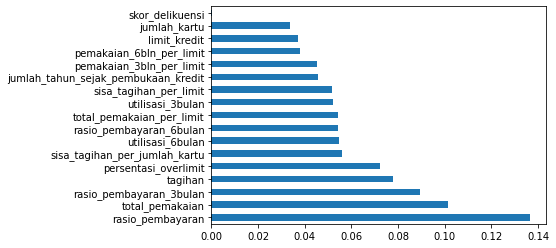

In [47]:
#check Feature importance to know the possibility of imporoving the model
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.pyplot.show()

In [48]:
feat_importances.nlargest(10)

rasio_pembayaran                 0.136690
total_pemakaian                  0.101196
rasio_pembayaran_3bulan          0.089562
tagihan                          0.077846
persentasi_overlimit             0.072404
sisa_tagihan_per_jumlah_kartu    0.055935
utilisasi_6bulan                 0.054583
rasio_pembayaran_6bulan          0.054136
total_pemakaian_per_limit        0.054061
utilisasi_3bulan                 0.052075
dtype: float64

Interpretation of feature importance

1. Rasio_pembayaran_3bulan is the most important factor to classify the debtors/customers, Impurity accross all trees in average are reduced by 0.175 due to this variable

2. All variables have some degree of importances (>0.02) and thus decided not to be dropped.

In [49]:
#using 10 Most important variable only for independent variable
used = ['rasio_pembayaran','total_pemakaian','rasio_pembayaran_3bulan', 'tagihan','rasio_pembayaran_6bulan',
        'sisa_tagihan_per_jumlah_kartu','persentasi_overlimit','utilisasi_6bulan','utilisasi_3bulan','sisa_tagihan_per_limit']
X_balance_train_important = X_balance_train[used].copy()
X_test_important = X_test[used].copy()
steps4 = [('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())]
pipeline4 = Pipeline(steps4)
pipeline4.fit(X_balance_train_important,Y_balance_train)
prediction5 = pipeline4.predict(X_test_important)
score_cv5 = cross_val_score(pipeline4,X_balance_train_important,Y_balance_train,cv=3)
print(classification_report(y_test, prediction5))
from sklearn.metrics import roc_auc_score
print('AUC:',roc_auc_score(y_test, prediction5))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2827
           1       0.32      0.36      0.34       272

    accuracy                           0.88      3099
   macro avg       0.63      0.64      0.64      3099
weighted avg       0.88      0.88      0.88      3099

AUC: 0.6446665817016584


In [50]:
#Generate the ROC AUC Result 
from sklearn.metrics import roc_auc_score
print('AUC:',roc_auc_score(y_test, prediction2))

AUC: 0.6385198401964253


ROC AUC Score is 63% and is considered Low